# Weather prediction example

This notebook shows a simple way to predict time series data using a PredictLite neural network

(c) Mikko Kursula 2022. MIT License. 

In [1]:
# Enable automatic reloading (if changes are done in the model code)
%load_ext autoreload
%autoreload 2

# General
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Data source
import meteostat

# PredictLite
from predictlite.predictlite import PredictLite

### Get weather dataset

In [2]:
# Get hourly weather data
station_id = '02944'
start_dt = datetime(2012, 1, 1)
end_dt = datetime(2022, 1, 1)
dataset = meteostat.Hourly(station_id, start_dt, end_dt).fetch()
dataset.head()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2012-01-01 00:00:00,-5.5,-5.6,99.0,NaN,NaN,220.0,7.2,NaN,1007.6,NaN,NaN
2012-01-01 01:00:00,-5.2,-5.5,98.0,NaN,NaN,200.0,7.2,NaN,1008.0,NaN,NaN
2012-01-01 02:00:00,-5.2,-5.5,98.0,NaN,NaN,220.0,7.2,NaN,1008.3,NaN,NaN
2012-01-01 03:00:00,-6.0,-6.1,99.0,NaN,NaN,220.0,7.2,NaN,1008.6,NaN,NaN
2012-01-01 04:00:00,-4.6,-5.1,96.0,NaN,NaN,260.0,3.6,NaN,1009.0,NaN,NaN


### Setup and train PredictLite model 

In [3]:
model = PredictLite(
    input_signals=['temp', 'rhum'], 
    input_preprocessing={'temp' : 'z-norm', 'rhum' : 'z-norm'},
    input_length=48, 
    output_signals=['temp', 'rhum'],
    output_length=24,
    resample_data=True,
    data_sample_period=3600,
    hidden_layer_n=0,
    train_sample_n=10000,
    test_sample_n=1000,
    epochs=20,
    random_seed=13,
    verbose=True,
)

model.fit(dataset)

Setting up preprocessing
Building dataset
Training the model
epoch:   0, train loss: 0.62936, test loss: 0.39150
epoch:   1, train loss: 0.32385, test loss: 0.30388
epoch:   2, train loss: 0.27850, test loss: 0.28122
epoch:   3, train loss: 0.26365, test loss: 0.27114
epoch:   4, train loss: 0.25635, test loss: 0.26392
epoch:   5, train loss: 0.25064, test loss: 0.25938
epoch:   6, train loss: 0.24644, test loss: 0.25557
epoch:   7, train loss: 0.24330, test loss: 0.25239
epoch:   8, train loss: 0.24031, test loss: 0.24934
epoch:   9, train loss: 0.23790, test loss: 0.24744
epoch:  10, train loss: 0.23620, test loss: 0.24478
epoch:  11, train loss: 0.23458, test loss: 0.24348
epoch:  12, train loss: 0.23323, test loss: 0.24306
epoch:  13, train loss: 0.23159, test loss: 0.24154
epoch:  14, train loss: 0.23114, test loss: 0.24085
epoch:  15, train loss: 0.23006, test loss: 0.24088
epoch:  16, train loss: 0.22870, test loss: 0.23937
epoch:  17, train loss: 0.22840, test loss: 0.23821
epo

In [4]:
model.model_summary()

PredictionModel(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=96, out_features=96, bias=True)
    (2): Linear(in_features=96, out_features=48, bias=True)
  )
)


### Make prediction

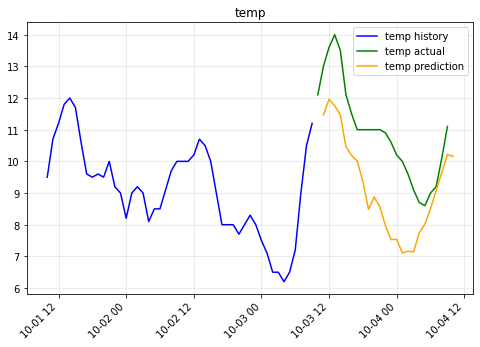

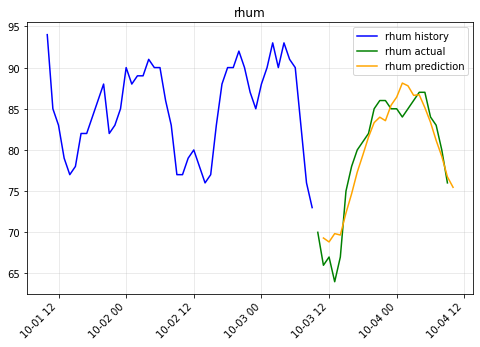

In [5]:
# Datetime for prediction start
prediction_time = datetime(2021, 10, 3, 10)

# Make prediction 
pred = model.predict(dataset, prediction_time)

# Plot data and prediction
pred_len = model.output_length
inp_len = model.input_length
for col in model.output_signals:
    
    ts_idx = dataset.index.get_loc(prediction_time, method='pad')
    plt.figure(figsize=(8, 5))
    plt.plot(
        dataset.index[ts_idx - inp_len : ts_idx].values, 
        dataset.iloc[ts_idx - inp_len : ts_idx][col].values, 
        color='blue', 
        label='{} history'.format(col)
    )
    plt.plot(
        dataset.index[ts_idx : ts_idx + pred_len].values, 
        dataset.iloc[ts_idx : ts_idx + pred_len][col].values, 
        color='green',
        label='{} actual'.format(col)
    )
    plt.plot(
        pred.index.values, 
        pred[col].values, 
        color='orange', 
        label='{} prediction'.format(col)
    )
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.title(col)
    plt.show()